In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 0: Merge all csv files into one and read in updated Data-Frame

In [2]:
path = "/content/drive/MyDrive/Data Science (Private)/CSV Files/002_Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [3]:
df = pd.read_csv("all_data_copy.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


### Step 1: Data Cleaning

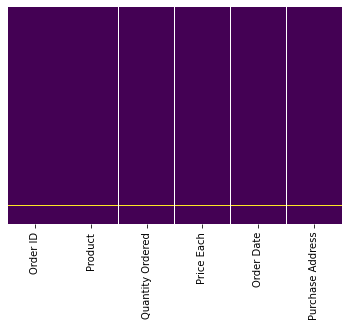

In [4]:
# Data Visualization 1: Heatmap for Missing Values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Interpretation: There is NaN row**

In [6]:
# Drop NaN row

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


### Step 2: Data Transformation

In [7]:
# Check Data-Types of Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Interpretation: Column 2 to 4 need to be numeric**

In [9]:
# Removing String "OR" between Numeric Data in Order Date column

df = df[df['Order Date'].str[0:2]!='Or']

In [10]:
# Converting Quantity Ordered AND Price Each column to Numeric

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

### Step 3: Data Augmentation

In [12]:
# Add Month column (containing first 2 char of str in Order Date Column as 32-Bit int)

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [13]:
# Add City column with State in brackets (Data before comma is city and after comma is state)

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA)


### Step 3: EDA

**Q1. Name of the month with most sales along with quantity of sales in it?**

In [14]:
# Calculating Sales as product of Quantity Ordered AND Price Each

df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

# Grouping by the month and Displaying Sum in each

df.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


range(1, 13)


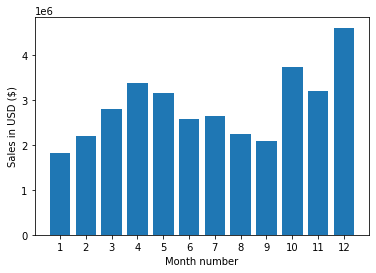

In [18]:
# Plotting Sales vs Month Bar-Chart 

months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

**Interpretation: December had most sales of over 4,500,000 US $**

**Question 2: City with most sales along with quantity of sales in it?**

In [20]:
# Grouping Data by City and Displaying Sum in each

df.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


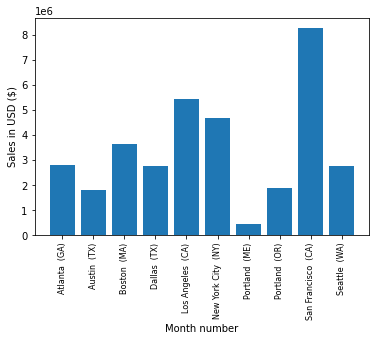

In [21]:
# Plotting Sales vs City Bar-Chart

keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

**Interpretation: San-Francisco had most sales over 8,500,000 US $**

**Q3. Best time for adverts for maximum chances of product being bought?**

In [22]:
# Add hour column

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA),15.36,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX),23.90,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA),11.95,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA),149.99,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA),11.95,19,3,1


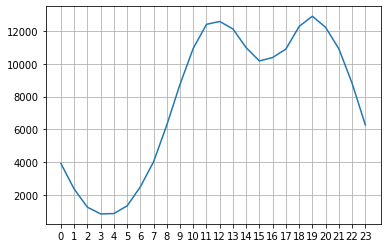

In [25]:
# Plotting Sales vs Time Graph

keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

**Interpretation: Best time for adverts would be slightly before 11 am or 7 pm**

**Q4. Products most often sold together?**

In [32]:
# Select rows if ID appears several times

DF = df[df['Order ID'].duplicated(keep=False)]

# Concatenate strings from several rows

DF['Grouped'] = DF.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_temp = DF[['Order ID', 'Grouped']].drop_duplicates()

# Count unique pair of numbers into dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_temp['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print("Products most often sold together with count:")

for key,value in count.most_common(10):
    print(key, value)

Products most often sold together with count:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Q5. Name and price of product sold most?**

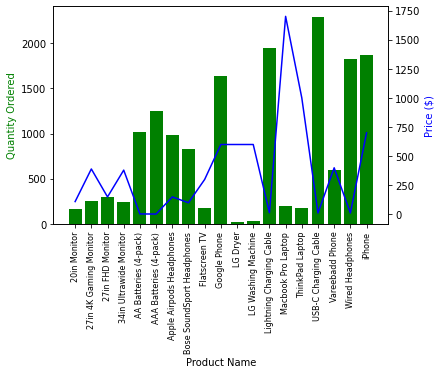

In [35]:
# Plotting prices on Sales vs Product Bar-Chart

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

**Interpretation: USB-C Charging Cable of price less than $250 sold most**